In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [119]:
data = pd.read_csv('gurgaon-outlier-treated.csv')

In [120]:
data.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score,area_room_ratio
0,flat,signature global park,sohna road,0.90,8036.0,1120.0,Built Up area: 1120 (104.05 sq.m.),3,2,0,2.0,NaN,Undefined,NaN,1120.0,NaN,0,0,0,0,0,0,58,373.333333
1,flat,m3m skywalk,sector 74,2.25,13636.0,1650.0,Super Built up area 2038(189.34 sq.m.)Built Up...,3,3,2,9.0,South,Relatively New,2038.0,1938.0,1650.0,1,0,0,0,0,1,174,550.000000
2,flat,satya the hermitage,sector 103,1.12,5625.0,1991.0,Super Built up area 1991(184.97 sq.m.)Carpet a...,3,4,3+,9.0,NaN,New Property,1991.0,NaN,1500.0,1,0,0,0,0,0,49,663.666667
3,flat,signature global solera,sector 107,0.27,5521.0,489.0,Carpet area: 489 (45.43 sq.m.),2,2,2,0.0,North-East,Relatively New,NaN,NaN,489.0,0,0,0,0,0,0,45,244.500000
4,house,sushant lok 1 builder floors,sector 43,2.45,7756.0,3159.0,Plot area 60(50.17 sq.m.)Built Up area: 540 sq...,4,4,3+,3.0,West,Moderately Old,NaN,540.0,351.0,1,1,1,0,1,2,123,789.750000


In [121]:
data.isnull().mean()*100

property_type           0.000000
society                 0.028043
sector                  0.000000
price                   0.000000
price_per_sqft          0.000000
area                    0.000000
areaWithType            0.000000
bedRoom                 0.000000
bathroom                0.000000
balcony                 0.000000
floorNum                0.504767
facing                 28.463264
agePossession           0.000000
super_built_up_area    47.392036
built_up_area          55.300056
carpet_area            48.317443
servant room            0.000000
study room              0.000000
pooja room              0.000000
store room              0.000000
others                  0.000000
furnished_type          0.000000
luxury_score            0.000000
area_room_ratio         0.000000
dtype: float64

In [122]:
data.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 18
facing                 1015
agePossession             0
super_built_up_area    1690
built_up_area          1972
carpet_area            1723
servant room              0
study room                0
pooja room                0
store room                0
others                    0
furnished_type            0
luxury_score              0
area_room_ratio           0
dtype: int64

In [123]:
df = data.copy()

## built up area

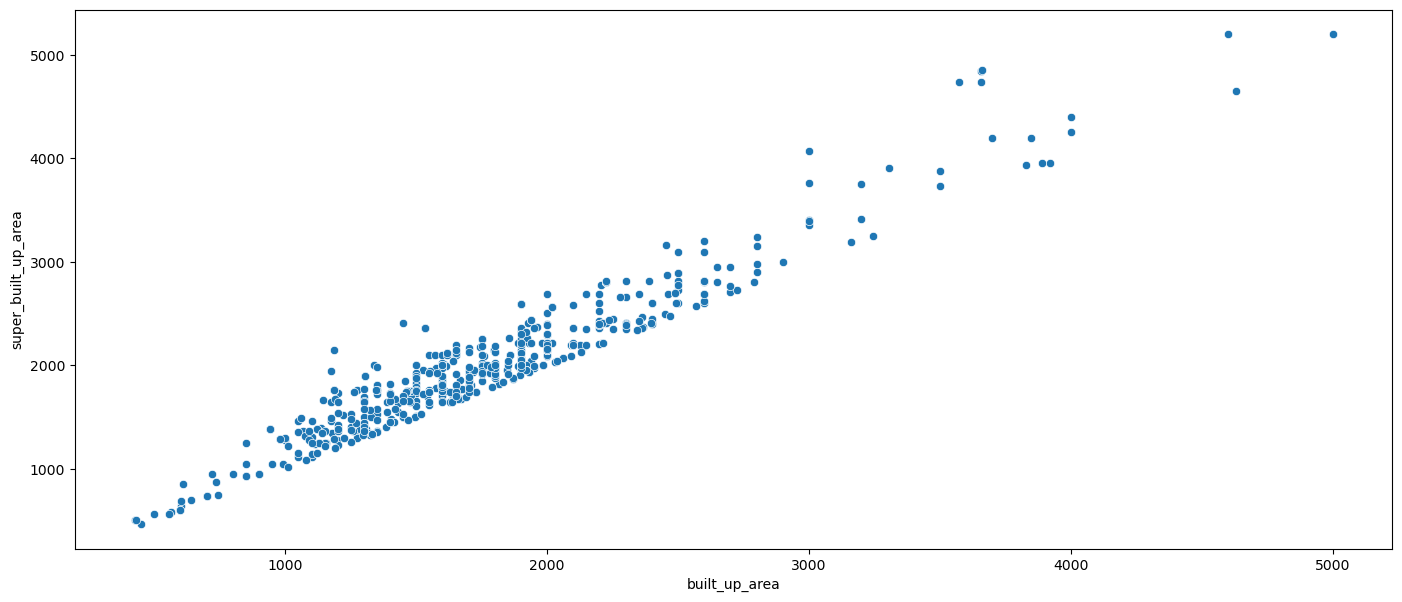

In [124]:
plt.figure(figsize = (17, 7))
sns.scatterplot(x = df['built_up_area'], y = df['super_built_up_area'])
plt.show()

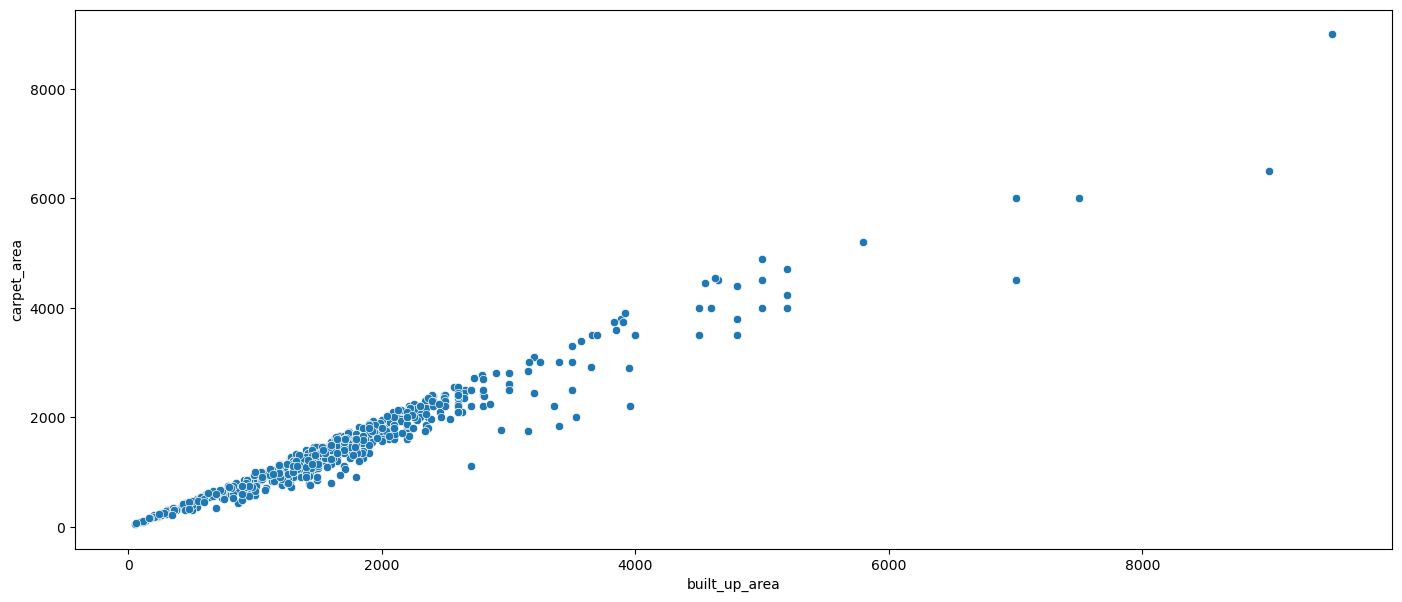

In [125]:
plt.figure(figsize = (17, 7))
sns.scatterplot(x = df['built_up_area'], y = df['carpet_area'])
plt.show()

In [126]:
df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score,area_room_ratio


In [127]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [128]:
all_present_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score,area_room_ratio
1,flat,m3m skywalk,sector 74,2.25,13636.0,1650.0,Super Built up area 2038(189.34 sq.m.)Built Up...,3,3,2,9.0,South,Relatively New,2038.0,1938.0,1650.00,1,0,0,0,0,1,174,550.000000
7,flat,ss,sector 85,1.98,8223.0,2408.0,Super Built up area 2408(223.71 sq.m.)Built Up...,3,4,3,6.0,West,Relatively New,2408.0,2300.0,2200.00,0,0,0,0,0,0,42,802.666667
24,flat,emaar palm gardens,sector 83,1.73,9105.0,1900.0,Super Built up area 1900(176.52 sq.m.)Built Up...,3,3,3,5.0,West,Relatively New,1900.0,1600.0,1240.04,1,0,0,0,0,1,174,633.333333
39,flat,central park resorts,sector 48,5.15,20901.0,2464.0,Super Built up area 2464(228.91 sq.m.)Built Up...,3,3,3+,8.0,North-West,Moderately Old,2464.0,2364.0,2264.00,1,0,0,0,0,2,53,821.333333
44,flat,umang monsoon breeze,sector 78,0.88,4746.0,1854.0,Super Built up area 1854(172.24 sq.m.)Built Up...,3,4,3,8.0,North-West,Moderately Old,1854.0,1668.0,1501.00,1,0,1,0,0,0,111,618.000000


In [129]:
super_built_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [130]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [131]:
super_built_to_built_up_ratio, carpet_to_built_up_ratio

(1.105263157894737, 0.9)

In [132]:
# both present but built up null 
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [133]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score,area_room_ratio
2,flat,satya the hermitage,sector 103,1.12,5625.0,1991.0,Super Built up area 1991(184.97 sq.m.)Carpet a...,3,4,3+,9.0,NaN,New Property,1991.0,NaN,1500.0,1,0,0,0,0,0,49,663.666667
8,flat,dlf regal gardens,sector 90,1.25,10417.0,1200.0,Super Built up area 1702(158.12 sq.m.)Carpet a...,3,3,3,18.0,North,Moderately Old,1702.0,NaN,1200.0,1,0,0,0,0,0,100,400.000000
17,flat,pareena coban residences,sector 99,1.32,6610.0,1997.0,Super Built up area 1997(185.53 sq.m.)Carpet a...,3,5,3,11.0,North-East,New Property,1997.0,NaN,1500.0,1,0,0,0,0,0,88,665.666667
43,flat,silverglades the melia,sohna road,1.01,6999.0,1443.0,Super Built up area 1450(134.71 sq.m.)Carpet a...,2,2,3,12.0,NaN,Undefined,1450.0,NaN,950.0,0,1,0,0,0,0,80,721.500000
48,flat,suncity avenue,sector 102,0.47,8935.0,526.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,5.0,South-East,Relatively New,632.0,NaN,532.0,0,0,0,1,0,0,142,263.000000


In [134]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2), inplace = True)

C:\Users\Shubham\AppData\Local\Temp\ipykernel_18372\790887362.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2), inplace = True)
C:\Users\Shubham\AppData\Local\Temp\ipykernel_18372\790887362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [135]:
df.update(sbc_df)

In [136]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 18
facing                 1015
agePossession             0
super_built_up_area    1690
built_up_area          1551
carpet_area            1723
servant room              0
study room                0
pooja room                0
store room                0
others                    0
furnished_type            0
luxury_score              0
area_room_ratio           0
dtype: int64

In [137]:
# sb present c is null built up is null 
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [138]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105), inplace = True)

C:\Users\Shubham\AppData\Local\Temp\ipykernel_18372\2152630007.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105), inplace = True)
C:\Users\Shubham\AppData\Local\Temp\ipykernel_18372\2152630007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fil

In [139]:
df.update(sb_df)

In [140]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 18
facing                 1015
agePossession             0
super_built_up_area    1690
built_up_area           675
carpet_area            1723
servant room              0
study room                0
pooja room                0
store room                0
others                    0
furnished_type            0
luxury_score              0
area_room_ratio           0
dtype: int64

In [141]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [142]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score,area_room_ratio
3,flat,signature global solera,sector 107,0.27,5521.0,489.0,Carpet area: 489 (45.43 sq.m.),2,2,2,0.0,North-East,Relatively New,NaN,NaN,489.0,0,0,0,0,0,0,45,244.500000
10,house,independent,sector 24,10.00,25543.0,3915.0,Carpet area: 435 (40.41 sq.m.),8,10,3+,1.0,West,Undefined,NaN,NaN,435.0,0,0,0,0,0,0,0,489.375000
13,flat,tulip violet,sector 69,2.00,10168.0,1967.0,Carpet area: 1967 (182.74 sq.m.),4,4,1,12.0,NaN,Relatively New,NaN,NaN,1967.0,0,0,0,0,0,0,79,491.750000
16,house,independent,sector 25,8.00,8000.0,10000.0,Carpet area: 10000 (929.03 sq.m.),3,9,2,3.0,NaN,New Property,NaN,NaN,10000.0,0,0,0,0,0,0,0,3333.333333
18,flat,eldeco accolade,sohna road,0.72,5737.0,1255.0,Carpet area: 1264 (117.43 sq.m.),2,2,3,8.0,West,Relatively New,NaN,NaN,1264.0,0,0,0,0,0,0,153,627.500000


In [143]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\Shubham\AppData\Local\Temp\ipykernel_18372\2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
C:\Users\Shubham\AppData\Local\Temp\ipykernel_18372\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['

In [144]:
df.update(c_df)

In [145]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 18
facing                 1015
agePossession             0
super_built_up_area    1690
built_up_area             0
carpet_area            1723
servant room              0
study room                0
pooja room                0
store room                0
others                    0
furnished_type            0
luxury_score              0
area_room_ratio           0
dtype: int64

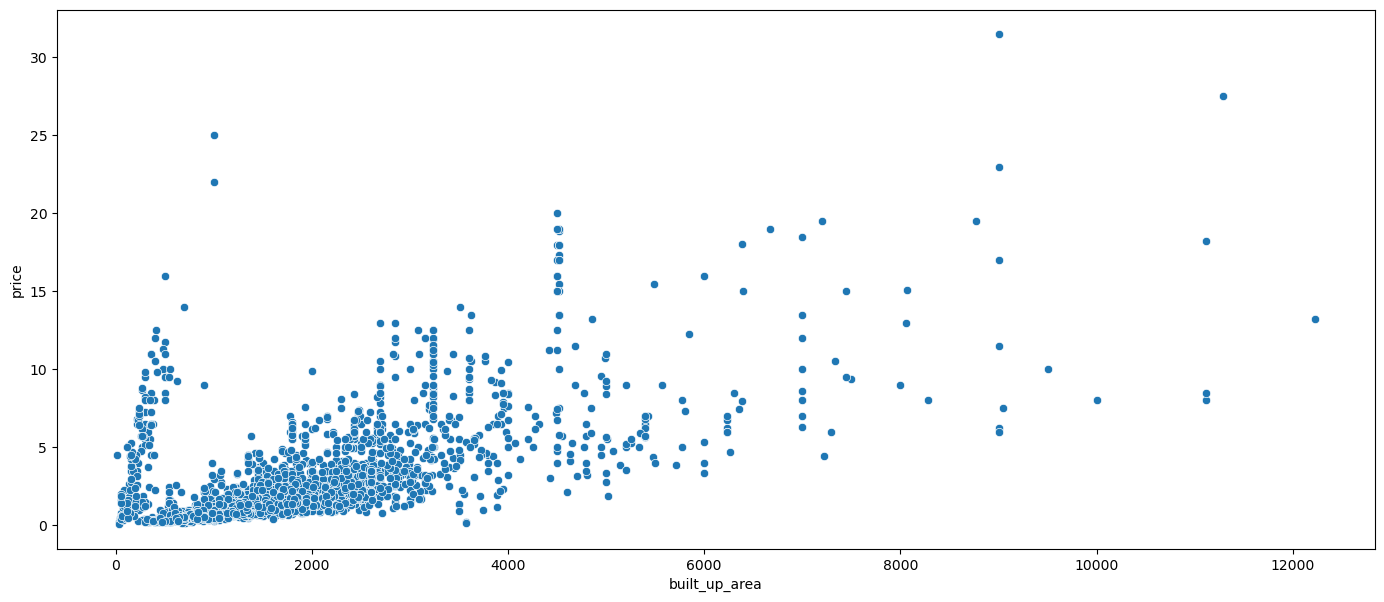

In [146]:
plt.figure(figsize = (17, 7))
sns.scatterplot(x = df['built_up_area'], y = df['price'])
plt.show()

some abnormal datapoints whose builtup area is less than 2000, and prices are very high till 25crors, 

In [147]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price', 'area', 'built_up_area']]

In [148]:
anamoly_df.sample(5)

,price,area,built_up_area
206,6.5,1836.0,215.0
1501,8.0,3132.0,387.0
2758,4.5,1350.0,1350.0
3015,9.5,4071.0,500.0
3016,3.3,1728.0,1728.0


In [149]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [150]:
df.update(anamoly_df)

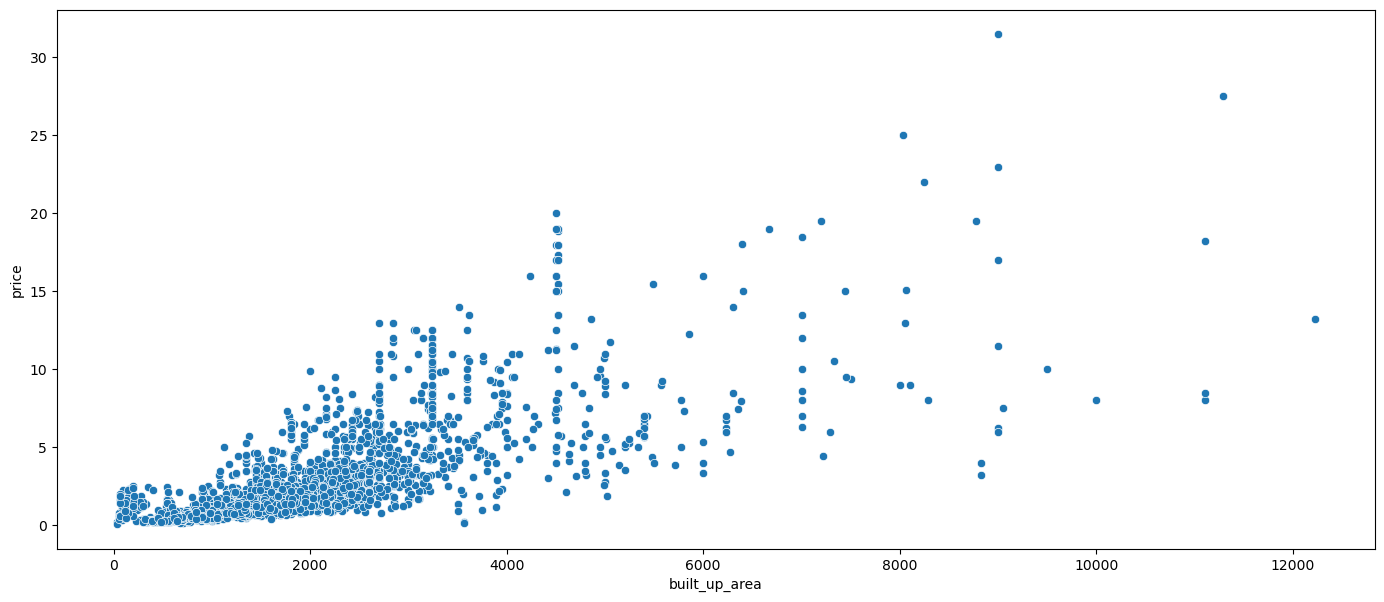

In [151]:
plt.figure(figsize = (17, 7))
sns.scatterplot(x = df['built_up_area'], y = df['price'])
plt.show()

In [152]:
# droping irrelevant cols now
df.drop(columns=['area', 'areaWithType', 'super_built_up_area', 'carpet_area', 'area_room_ratio'], inplace = True)

In [153]:
df.head(2)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score
0,flat,signature global park,sohna road,0.90,8036.0,3,2,0,2.0,NaN,Undefined,1120.0,0,0,0,0,0,0,58
1,flat,m3m skywalk,sector 74,2.25,13636.0,3,3,2,9.0,South,Relatively New,1938.0,1,0,0,0,0,1,174


## floornum

In [154]:
df[df['floorNum'].isnull()].shape[0]

18

In [155]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score
164,house,dlf new town heights,sector 86,2.47,7719.0,4,4,3+,NaN,West,Moderately Old,2800.0,1,0,1,0,0,1,130
213,house,independent,sector 23,5.60,17284.0,8,6,3+,NaN,South-West,Moderately Old,3240.0,1,1,1,1,0,0,0
237,house,independent,sector 4,0.65,11111.0,4,2,2,NaN,NaN,Moderately Old,585.0,0,0,0,0,0,0,0
373,house,independent,sector 11,1.10,8148.0,2,2,1,NaN,NaN,Old Property,150.0,0,0,0,0,1,0,0
732,house,independent,sector 4,4.12,8889.0,2,1,3+,NaN,NaN,Moderately Old,4635.0,0,0,0,0,0,0,0
1074,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,NaN,Relatively New,3240.0,0,0,0,0,0,0,21
1165,flat,experion heartsong,sector 99,1.08,6150.0,3,3,0,NaN,NaN,Under Construction,1758.0,0,0,0,0,0,0,0
1227,house,independent,sector 5,1.50,10288.0,3,3,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,0,0
1357,house,ansal sushant lok plots,sector 43,3.30,26570.0,1,1,0,NaN,NaN,Under Construction,1242.0,0,0,0,0,0,0,0
1392,house,independent,sector 26,4.60,12198.0,4,4,3+,NaN,NaN,Old Property,3771.0,0,0,0,0,0,0,28


In [156]:
# filling median floornum value of houses in missing cols 
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [157]:
df['floorNum'].fillna(2.0, inplace = True)

C:\Users\Shubham\AppData\Local\Temp\ipykernel_18372\3175433704.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0, inplace = True)


In [158]:
df.isnull().sum()

property_type        0
society              1
sector               0
price                0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
floorNum             0
facing            1015
agePossession        0
built_up_area        0
servant room         0
study room           0
pooja room           0
store room           0
others               0
furnished_type       0
luxury_score         0
dtype: int64

In [159]:
df.shape

(3566, 19)

## facing

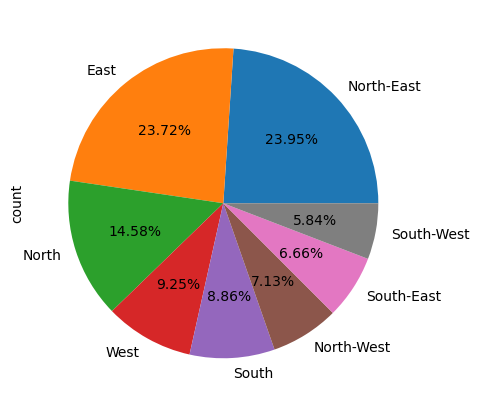

In [160]:
plt.figure(figsize = (5, 6))
df['facing'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
plt.show()

In [161]:
df['facing'].isnull().mean()*100

np.float64(28.46326416152552)

In [162]:
df['facing'].isnull().sum()

np.int64(1015)

In [163]:
df.drop(columns = 'facing', inplace = True)

## society

In [164]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score
3243,flat,NaN,sector 78,0.6,3692.0,2,2,0,2.0,Under Construction,1625.0,0,0,0,0,0,0,0


In [165]:
df.drop(index = 3243, inplace = True)

In [166]:
df.shape

(3565, 18)

In [167]:
df.isnull().sum()

property_type     0
society           0
sector            0
price             0
price_per_sqft    0
bedRoom           0
bathroom          0
balcony           0
floorNum          0
agePossession     0
built_up_area     0
servant room      0
study room        0
pooja room        0
store room        0
others            0
furnished_type    0
luxury_score      0
dtype: int64

## agePossesion

this cols contain undefined values

In [168]:
df['agePossession'].value_counts()

agePossession
Relatively New        1607
New Property           557
Moderately Old         545
Undefined              433
Old Property           299
Under Construction     124
Name: count, dtype: int64

In [169]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score
0,flat,signature global park,sohna road,0.90,8036.0,3,2,0,2.0,Undefined,1120.0,0,0,0,0,0,0,58
6,flat,lavanya apartments,sector 81,0.90,5056.0,3,3,0,7.0,Undefined,1780.0,0,0,0,0,0,0,0
10,house,independent,sector 24,10.00,25543.0,8,10,3+,1.0,Undefined,3915.0,0,0,0,0,0,0,0
12,flat,chd avenue,sector 71,0.95,7917.0,2,2,0,5.0,Undefined,1200.0,0,0,0,0,0,0,0
14,house,independent,sector 43,2.15,13030.0,1,1,0,1.0,Undefined,1650.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3525,flat,m3m one key resiments,sector 67,0.80,13115.0,1,1,0,0.0,Undefined,610.0,0,0,0,0,0,0,0
3531,flat,tashee capital gateway,sector 111,0.96,6500.0,2,2,1,4.0,Undefined,1338.0,0,1,0,0,0,0,53
3544,house,sare crescent parc royal greens phase 1,sector 92,0.85,4877.0,4,4,3,4.0,Undefined,1743.0,0,0,0,0,0,0,0
3559,house,independent,sector 67,3.00,11905.0,4,4,0,3.0,Undefined,2800.0,0,0,0,0,0,0,0


In [170]:
# filling the mode value in ageposeesion on the based of same setcor and property type
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [171]:
df['agePossession'] = df.apply(mode_based_imputation, axis = 1)

In [172]:
df['agePossession'].value_counts()

agePossession
Relatively New        1787
New Property           629
Moderately Old         591
Old Property           334
Under Construction     126
Undefined               98
Name: count, dtype: int64

In [173]:
# filling mode value in age on the based of sector 
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [174]:
df['agePossession'] = df.apply(mode_based_imputation2, axis = 1)

In [175]:
df['agePossession'].value_counts()

agePossession
Relatively New        1806
New Property           655
Moderately Old         598
Old Property           334
Under Construction     126
Undefined               46
Name: count, dtype: int64

In [176]:
# filling mode vale of age on the based property_type
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [177]:
df['agePossession'] = df.apply(mode_based_imputation3, axis = 1)

In [178]:
df['agePossession'].value_counts()

agePossession
Relatively New        1825
New Property           655
Moderately Old         625
Old Property           334
Under Construction     126
Name: count, dtype: int64

In [179]:
df.isnull().sum()

property_type     0
society           0
sector            0
price             0
price_per_sqft    0
bedRoom           0
bathroom          0
balcony           0
floorNum          0
agePossession     0
built_up_area     0
servant room      0
study room        0
pooja room        0
store room        0
others            0
furnished_type    0
luxury_score      0
dtype: int64

In [180]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv', index = False)